<a href="https://colab.research.google.com/github/rafagarc/eleicoes_2022/blob/main/Candidatos_outros_recortes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recortes gerais das candidaturas

In [1]:
# Fontes dos dados

# 2018: https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2018.zip

# 2022: https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2022.zip

# Consulte os metadados: https://drive.google.com/file/d/1mM1U-2hN-9usXOE4Dyvewk_wWjN-ZMuW/

In [2]:
# O TSE impede o colab de carregar os dados diretamente. Baixei e salvei os datasets no Google Drive e no Github

In [3]:
# Pandas é a biblioteca de código que usamos para processar os dados

import pandas as pd

In [4]:
# Matplotlib e Seaborn são as bibliotecas para geraçao de gráficos
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [5]:
# ID dos datasets salvos no Google Sheets
id_planilha_2018 = '1TilkWAd_vya4MlS0V4kCib8p23FKKqvjoToy0mywAko'
id_planilha_2022 = '1v0EcG29yzU2JhY_5cAin1KQrpwL3K5-Ar9-2IPJoujc'

# ID das abas com as eleições de 2018 e 2022
eleicoes_2018 = '124256647'
eleicoes_2022 = '1264465923'

In [6]:
# Carrega os datasets no Pandas usando uma URL do Google Drive e no Github para baixar CSVs

candidatos_2018 = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id_planilha_2018}/gviz/tq?tqx=out:csv&gid={eleicoes_2018}')

candidatos_2022 = pd.read_csv('https://raw.githubusercontent.com/rafagarc/eleicoes_2022/main/consulta_cand_2022_BRASIL.csv', sep=';', encoding='ISO-8859-1')

In [7]:
# Junta os dois datasets em um só

candidatos = pd.concat([candidatos_2018, candidatos_2022]).reset_index(drop=True)

In [8]:
# Renomeia os datasets
df = candidatos

In [9]:
# Deleta dataframes usados só para manipulação
del candidatos
del candidatos_2018
del candidatos_2022

In [10]:
# Soma o número total de candidatos dos dois anos

total_candidatos = [df[df['ANO_ELEICAO'] == 2018].shape[0], df[df['ANO_ELEICAO'] == 2022].shape[0]]

## Total de candidatos
Número de candidatos para todos os cargos nas eleições de 2018 e 2022

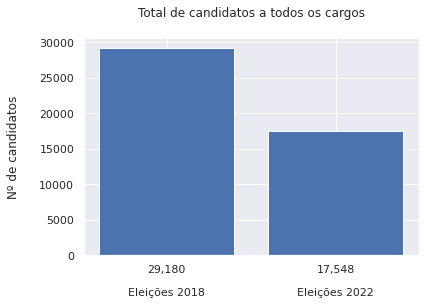

In [11]:
plt.bar([f'{total_candidatos[0]:,}\n\nEleições 2018', f'{total_candidatos[1]:,}\n\nEleições 2022'],total_candidatos)
plt.xlabel('')
plt.ylabel('Nº de candidatos\n')
plt.title('Total de candidatos a todos os cargos\n')
plt.show()

In [12]:
# Corrige a sigla dos partidos que mudaram de nome entre 2018 e 2022
# Para partidos incorporados mudamos o nome retroativamente, para efeito de comparação

nome_partido = {'PR':'PL', 'PPS':'CIDADANIA', 'PRB':'REPUBLICANOS', 'DEM':'UNIÃO', 'PTC':'AGIR', 'PSL':'UNIÃO',
                'PPL': 'PC do B', 'PRP':'PATRIOTA', 'PHS':'PODE'}

df['SG_PARTIDO'] = df.SG_PARTIDO.replace(nome_partido)

In [13]:
ranking_partidos = df.groupby(['SG_PARTIDO', 'ANO_ELEICAO']).SQ_CANDIDATO.count().reset_index().sort_values(by='SQ_CANDIDATO', ascending=False).reset_index(drop=True)

In [14]:
ranking_partidos = ranking_partidos.pivot(index='SG_PARTIDO', columns='ANO_ELEICAO', values='SQ_CANDIDATO').fillna(0).astype(int).sort_values(by=2022, ascending=False)

## Candidatos por partido
### Nome do partido atualizado para 2022
#### Para partidos incorporados/fundidos mudamos o nome retroativamente

In [15]:
ranking_partidos.reset_index()

ANO_ELEICAO,SG_PARTIDO,2018,2022
0,UNIÃO,2250,1224
1,PL,724,1122
2,REPUBLICANOS,858,1020
3,PODE,1936,991
4,PSB,956,957
5,PP,761,914
6,PT,1313,825
7,AVANTE,1050,819
8,PSD,702,790
9,SOLIDARIEDADE,788,755


In [16]:
raca = df.groupby(['ANO_ELEICAO', 'DS_COR_RACA']).SQ_CANDIDATO.count().reset_index().sort_values(by=['DS_COR_RACA', 'ANO_ELEICAO'], ascending=True)
raca = raca.replace('NÃO DIVULGÁVEL', 'NÃO INFORMADO')
raca.columns = ['Eleição', 'Cor/Raça', 'Candidatos']
raca['Cor/Raça'] = raca['Cor/Raça'].str.capitalize()

In [17]:
raca

,Eleição,Cor/Raça,Candidatos
0,2018,Amarela,169
6,2022,Amarela,71
1,2018,Branca,15307
7,2022,Branca,8809
2,2018,Indígena,134
8,2022,Indígena,115
3,2018,Não informado,1
9,2022,Não informado,117
4,2018,Parda,10406
10,2022,Parda,5992


In [18]:
raca_pie_1 = raca[raca['Eleição'] == 2018].Candidatos
raca_pie_2 = raca[raca['Eleição'] == 2022].Candidatos
raca_pie_labels = raca[raca['Eleição'] == 2022]['Cor/Raça']


In [19]:
raca_colors = ['#f9c97d', '#ffdbac', '#f09c81', '#cccccc', '#c68642', '#8d5524']

## Candidatos por raça

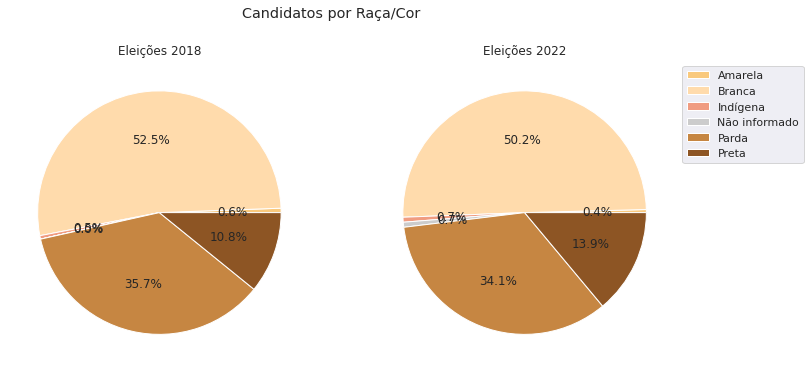

In [20]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.pie(raca_pie_1, autopct='%1.1f%%', colors=raca_colors)
ax2.pie(raca_pie_2, autopct='%1.1f%%', colors=raca_colors)

ax1.title.set_text('Eleições 2018')
ax2.title.set_text('Eleições 2022')
plt.legend(raca_pie_labels, bbox_to_anchor=(1,1))
plt.suptitle('Candidatos por Raça/Cor')

plt.show()

In [21]:
raca_partido = df.groupby(['ANO_ELEICAO','DS_COR_RACA', 'SG_PARTIDO']).SQ_CANDIDATO.count().reset_index().sort_values(by='SQ_CANDIDATO', ascending=False)

In [22]:
raca_partido

,ANO_ELEICAO,DS_COR_RACA,SG_PARTIDO,SQ_CANDIDATO
56,2018,BRANCA,UNIÃO,1287
32,2018,BRANCA,PATRIOTA,1036
40,2018,BRANCA,PODE,966
91,2018,PARDA,PATRIOTA,917
115,2018,PARDA,UNIÃO,824
...,...,...,...,...
155,2022,AMARELA,PMB,1
152,2022,AMARELA,PATRIOTA,1
148,2022,AMARELA,AVANTE,1
84,2018,NÃO DIVULGÁVEL,NOVO,1


In [23]:
partido_raca = pd.pivot(raca_partido[raca_partido.ANO_ELEICAO == 2022],index='SG_PARTIDO',columns='DS_COR_RACA', values='SQ_CANDIDATO').fillna(0).astype(int).reset_index()

In [24]:
partido_raca

DS_COR_RACA,SG_PARTIDO,AMARELA,BRANCA,INDÍGENA,NÃO INFORMADO,PARDA,PRETA
0,AGIR,2,65,0,23,91,40
1,AVANTE,1,369,0,0,342,107
2,CIDADANIA,3,176,0,0,102,49
3,DC,1,73,1,0,76,21
4,MDB,0,342,2,2,242,87
5,NOVO,4,376,0,0,73,19
6,PATRIOTA,1,346,1,0,273,93
7,PC do B,0,65,2,0,69,34
8,PCB,0,9,0,1,4,10
9,PDT,3,346,5,2,264,121


In [25]:
partido_raca['TODAS'] = partido_raca['PRETA']+partido_raca['PARDA']+partido_raca['AMARELA']+partido_raca['BRANCA']+partido_raca['INDÍGENA']

In [26]:
partido_raca['pct_pretos_pardos'] = ((partido_raca['PRETA']+partido_raca['PARDA'])/partido_raca['TODAS']*100).round(1)

In [27]:
raca_ranking = partido_raca.sort_values(by='pct_pretos_pardos', ascending=False).reset_index(drop=True)

In [28]:
raca_ranking.columns = ['Partido', 'Amarela', 'Branca', 'Indígena', 
                        'Não informado', 'Parda', 'Preta', 'Todas', 
                        'Pretos+Pardos (%)']

In [29]:
negros_ranking = raca_ranking[['Partido', 'Parda', 'Preta', 'Todas', 'Pretos+Pardos (%)']]

### Partidos com mais negros/pardos (%)

In [30]:
negros_ranking

,Partido,Parda,Preta,Todas,Pretos+Pardos (%)
0,AGIR,91,40,198,66.2
1,PMB,60,9,112,61.6
2,PRTB,108,24,216,61.1
3,PCB,4,10,23,60.9
4,UP,11,17,46,60.9
5,PC do B,69,34,170,60.6
6,PMN,214,60,453,60.5
7,PSC,229,54,481,58.8
8,PSOL,151,264,713,58.2
9,DC,76,21,172,56.4


In [31]:
raca_ranking['Indigenas (%)'] = (raca_ranking['Indígena']/raca_ranking['Todas']*100).round(1)

In [32]:
ranking_indigenas = raca_ranking.sort_values(by='Indigenas (%)', ascending=False)[['Partido', 'Indígena', 'Todas', 'Indigenas (%)']]

### Partidos com mais indígenas (%)

In [33]:
ranking_indigenas

,Partido,Indígena,Todas,Indigenas (%)
10,REDE,12,409,2.9
8,PSOL,21,713,2.9
18,PT,18,825,2.2
4,UP,1,46,2.2
17,PSTU,2,118,1.7
5,PC do B,2,170,1.2
7,PSC,6,481,1.2
14,PV,3,240,1.2
28,PTB,4,503,0.8
13,PDT,5,739,0.7


In [34]:
genero = df.groupby(['ANO_ELEICAO', 'DS_GENERO']).SQ_CANDIDATO.count().reset_index().sort_values(by=['ANO_ELEICAO', 'DS_GENERO'], ascending=True)
genero.columns = ['Eleição', 'Gênero', 'Candidatos']
genero['Gênero'] = genero['Gênero'].str.capitalize()
genero = genero[genero['Gênero'] != 'Não Divulgável']
genero

,Eleição,Gênero,Candidatos
0,2018,Feminino,9221
1,2018,Masculino,19958
2,2018,Não divulgável,1
3,2022,Feminino,5867
4,2022,Masculino,11681


In [35]:
genero_pie_1 = genero[genero['Eleição'] == 2018].Candidatos
genero_pie_2 = genero[genero['Eleição'] == 2022].Candidatos
genero_pie_labels = genero[genero['Eleição'] == 2018]['Gênero']

## Candidatos por gênero

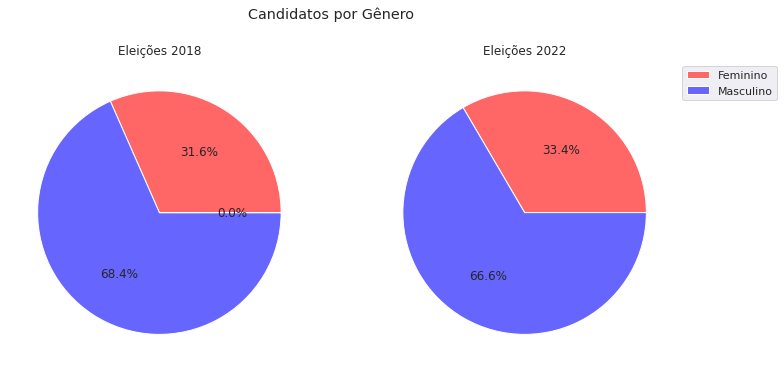

In [36]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.pie(genero_pie_1, autopct='%1.1f%%', colors=['#ff6666', '#6666ff', '#cccccc'])
ax2.pie(genero_pie_2, autopct='%1.1f%%', colors=['#ff6666', '#6666ff', '#cccccc'])

ax1.title.set_text('Eleições 2018')
ax2.title.set_text('Eleições 2022')
plt.legend(genero_pie_labels, bbox_to_anchor=(1,1))
plt.suptitle('Candidatos por Gênero')

plt.show()

In [37]:
idade_genero = df[df.ANO_ELEICAO == 2022].groupby(['NR_IDADE_DATA_POSSE', 'DS_GENERO']).SQ_CANDIDATO.count().reset_index().sort_values(by='NR_IDADE_DATA_POSSE', ascending=False).reset_index(drop=True)

In [38]:
idade_genero = idade_genero.pivot(index='NR_IDADE_DATA_POSSE', columns='DS_GENERO', values='SQ_CANDIDATO').reset_index().fillna(0).astype(int)

In [39]:
idade_genero = idade_genero.sort_values(by='NR_IDADE_DATA_POSSE').reset_index(drop=True)
idade_genero['NR_IDADE_DATA_POSSE'] = idade_genero['NR_IDADE_DATA_POSSE'].astype(int)

In [40]:
idade_genero.columns = ['Idade', 'Feminino', 'Masculino']

In [41]:
idade_genero

,Idade,Feminino,Masculino
0,20,2,0
1,21,16,21
2,22,21,19
3,23,22,28
4,24,30,33
...,...,...,...
66,87,0,1
67,88,1,0
68,89,1,0
69,90,0,1


In [42]:
idade_melt = pd.melt(idade_genero, id_vars=['Idade'], value_vars=['Feminino', 'Masculino'])

In [43]:
idade_melt.columns = ['Idade', 'Gênero', 'Candidatos']

### Disparidade de gênero por idade

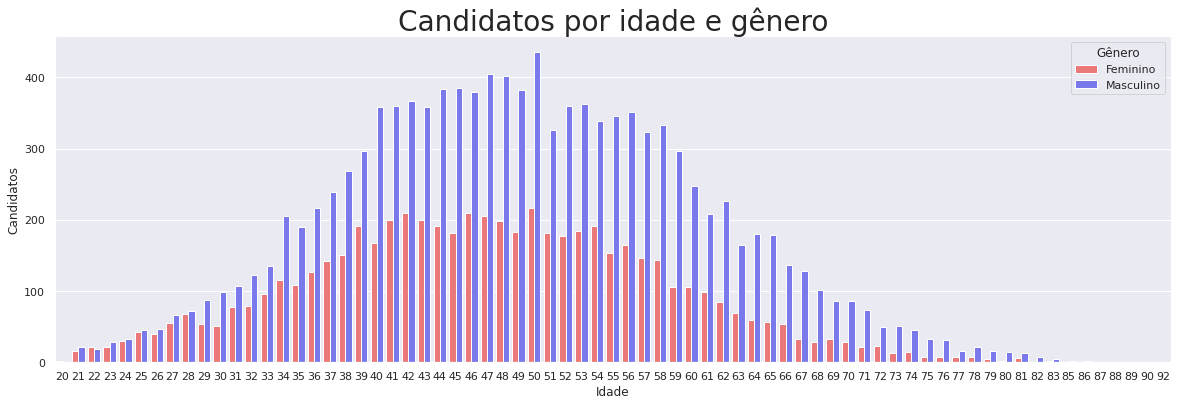

In [44]:
plt.figure(figsize = (20,6))
plt.title('Candidatos por idade e gênero', size=28)
sns.barplot(data=idade_melt, x="Idade", y='Candidatos', hue="Gênero", palette=['#ff6666', '#6666ff'])
# plt.xticks()
plt.show()

In [45]:
genero_partido = df.groupby(['SG_PARTIDO', 'DS_GENERO']).SQ_CANDIDATO.count().reset_index().sort_values(by='SQ_CANDIDATO', ascending=False).pivot(columns='DS_GENERO', index='SG_PARTIDO', values='SQ_CANDIDATO').fillna(0).astype(int).reset_index()

In [46]:
genero_partido['pct_mulheres'] = (genero_partido['FEMININO']*100/(genero_partido['FEMININO']+genero_partido['MASCULINO'])).round(1)

In [47]:
genero_partido = genero_partido.sort_values(by='pct_mulheres', ascending=False).reset_index(drop=True)

In [48]:
genero_partido.columns = ['Partido', 'Mulheres', 'Homens', 'Não informado', 'Mulheres (%)']

### Partidos com mais mulheres (%)

In [49]:
genero_partido.insert(loc=0, column='Posição', value=pd.Series(genero_partido.index.values)+1)

In [50]:
genero_partido

,Posição,Partido,Mulheres,Homens,Não informado,Mulheres (%)
0,1,UP,30,16,0,65.2
1,2,PSTU,128,202,0,38.8
2,3,PMB,220,351,0,38.5
3,4,PSOL,738,1325,0,35.8
4,5,PT,757,1381,0,35.4
5,6,PV,393,755,0,34.2
6,7,PCB,41,80,0,33.9
7,8,PSDB,558,1090,0,33.9
8,9,MDB,609,1196,0,33.7
9,10,PC do B,533,1058,0,33.5


In [51]:
escolaridade = df.groupby(['ANO_ELEICAO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO']).SQ_CANDIDATO.count().reset_index().sort_values(by='CD_GRAU_INSTRUCAO', ascending=True)

In [52]:
escolaridade['DS_GRAU_INSTRUCAO'] = escolaridade['DS_GRAU_INSTRUCAO'].str.capitalize()

In [53]:
escolaridade.columns = ['Eleição', 'Código', 'Grau de instrução', 'Número de candidatos']

In [54]:
escolaridade = escolaridade.pivot(index=['Código', 'Grau de instrução'], columns='Eleição', values='Número de candidatos').fillna(0).astype(int).reset_index().sort_values(by='Código', ascending=False)[['Grau de instrução', 2018, 2022]].reset_index(drop=True)

In [55]:
escolaridade['2018 (%)'] = (escolaridade[2018]/escolaridade[2018].sum()*100).round(1)

In [56]:
escolaridade['2022 (%)'] = (escolaridade[2022]/escolaridade[2022].sum()*100).round(1)

In [57]:
escolaridade_t = escolaridade.transpose().reset_index()[3:]

In [58]:
escolaridade_t.columns = ['Eleição'] + escolaridade['Grau de instrução'].to_list()

In [59]:
escolaridade_t = escolaridade_t.set_index('Eleição')

## Escolaridade dos candidatos

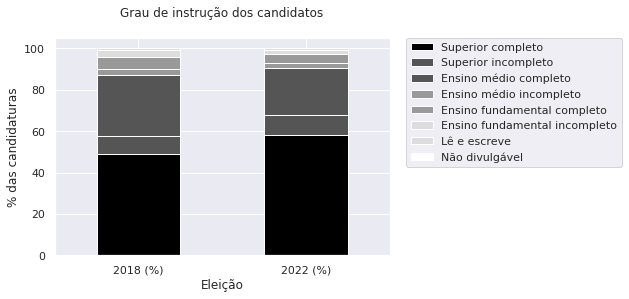

In [60]:
# create stacked bar chart for monthly temperatures
escolaridade_t.plot(kind='bar', stacked=True, color=['#000000', '#555555', '#555555', '#999999', '#999999', '#dddddd', '#dddddd', '#ffffff'])
 
# labels for x & y axis
plt.xlabel('Eleição', rotation=0)
plt.ylabel('% das candidaturas')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
 
# title of plot
plt.title('Grau de instrução dos candidatos\n')
plt.show()

In [61]:
escolaridade_t

,Superior completo,Superior incompleto,Ensino médio completo,Ensino médio incompleto,Ensino fundamental completo,Ensino fundamental incompleto,Lê e escreve,Não divulgável
Eleição,,,,,,,,
2018 (%),48.9,9.0,29.3,2.9,5.8,3.2,1.0,0.0
2022 (%),58.2,9.4,23.1,2.4,4.1,2.2,0.6,0.0


In [62]:
escolaridade

Eleição,Grau de instrução,2018,2022,2018 (%),2022 (%)
0,Superior completo,14255,10210,48.9,58.2
1,Superior incompleto,2633,1658,9.0,9.4
2,Ensino médio completo,8555,4060,29.3,23.1
3,Ensino médio incompleto,832,416,2.9,2.4
4,Ensino fundamental completo,1691,713,5.8,4.1
5,Ensino fundamental incompleto,920,381,3.2,2.2
6,Lê e escreve,293,110,1.0,0.6
7,Não divulgável,1,0,0.0,0.0


In [63]:
escolaridade_partido = df.groupby(['ANO_ELEICAO', 'SG_PARTIDO', 'CD_GRAU_INSTRUCAO', 
                                   'DS_GRAU_INSTRUCAO']).SQ_CANDIDATO.count().reset_index().sort_values(by=['ANO_ELEICAO', 'SG_PARTIDO',
                                                                                                            'CD_GRAU_INSTRUCAO'], ascending=False)

In [64]:
escolaridade_partido[escolaridade_partido['ANO_ELEICAO'] == 2022].reset_index(drop=True)

,ANO_ELEICAO,SG_PARTIDO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,SQ_CANDIDATO
0,2022,UP,8,SUPERIOR COMPLETO,23
1,2022,UP,7,SUPERIOR INCOMPLETO,9
2,2022,UP,6,ENSINO MÉDIO COMPLETO,9
3,2022,UP,5,ENSINO MÉDIO INCOMPLETO,1
4,2022,UP,4,ENSINO FUNDAMENTAL COMPLETO,2
...,...,...,...,...,...
201,2022,AGIR,6,ENSINO MÉDIO COMPLETO,80
202,2022,AGIR,5,ENSINO MÉDIO INCOMPLETO,7
203,2022,AGIR,4,ENSINO FUNDAMENTAL COMPLETO,11
204,2022,AGIR,3,ENSINO FUNDAMENTAL INCOMPLETO,15


In [65]:
escolaridade_partido = escolaridade_partido[(escolaridade_partido['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO') & (escolaridade_partido['ANO_ELEICAO'] == 2022)]

In [66]:
diplomados_partido = escolaridade_partido[escolaridade_partido['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO'].reset_index(drop=True)

In [67]:
diplomados_partido.columns = ['Eleição', 'Partido', 'Código', 'Grau de instrução', 'Candidatos com superior completo']

In [68]:
diplomados_partido = diplomados_partido[['Eleição', 'Partido', 'Candidatos com superior completo']]

In [69]:
# Cria um outro dataframe com os totais de candidatos, para fusão

In [70]:
ranking_partidos_merger = ranking_partidos.reset_index()[['SG_PARTIDO', 2022]]

In [71]:
ranking_partidos_merger.columns = ['Partido', 'Total de candidatos']

In [72]:
diplomados_partido = diplomados_partido.merge(ranking_partidos_merger, how='left', on='Partido')

In [73]:
diplomados_partido['Percentual de diplomados'] =(diplomados_partido['Candidatos com superior completo']/diplomados_partido['Total de candidatos']*100).round(1)

In [74]:
diplomados_partido = diplomados_partido.sort_values(by='Percentual de diplomados', ascending=False).reset_index(drop=True)

### Partidos com mais diplomados (%)

In [75]:
diplomados_partido

,Eleição,Partido,Candidatos com superior completo,Total de candidatos,Percentual de diplomados
0,2022,NOVO,397,472,84.1
1,2022,PT,611,825,74.1
2,2022,PSTU,81,118,68.6
3,2022,PC do B,114,170,67.1
4,2022,PSD,510,790,64.6
5,2022,UNIÃO,789,1224,64.5
6,2022,MDB,431,675,63.9
7,2022,PL,715,1122,63.7
8,2022,PV,152,240,63.3
9,2022,PSOL,441,713,61.9


# Recortes por profissão

In [76]:
profissoes = df.groupby(['ANO_ELEICAO', 'CD_OCUPACAO','DS_OCUPACAO']).SQ_CANDIDATO.count().reset_index().sort_values(by=['ANO_ELEICAO','SQ_CANDIDATO'], ascending=False).reset_index(drop=True)

In [77]:
# Quantidade de profissões diferentes no dataset

len(profissoes.DS_OCUPACAO.unique())

235

In [78]:
top10_2018 = profissoes[(profissoes['ANO_ELEICAO'] == 2018) & (profissoes['DS_OCUPACAO'] != 'OUTROS')].head(10).reset_index(drop=True)

In [79]:
top10_2022 = profissoes[(profissoes['ANO_ELEICAO'] == 2022) & (profissoes['DS_OCUPACAO'] != 'OUTROS')].head(10).reset_index(drop=True)

In [80]:
top10_2022.columns = ['Eleição', 'Código', 'Eleição 2022' , 'Candidatos']
top10_2018.columns = ['Eleição', 'Código', 'Eleição 2018' , 'Candidatos']
top10_2022 = top10_2022[['Eleição 2022', 'Candidatos']]
top10_2018 = top10_2018[['Eleição 2018', 'Candidatos']]
top10_profissoes = pd.concat([top10_2018, top10_2022], axis=1).reset_index()

In [81]:
top10_profissoes['Eleição 2018'] = top10_profissoes['Eleição 2018'].str.capitalize()
top10_profissoes['Eleição 2022'] = top10_profissoes['Eleição 2022'].str.capitalize()

### Top 10 profissões

In [82]:
top10_profissoes

,index,Eleição 2018,Candidatos,Eleição 2022,Candidatos
0,0,Empresário,3026,Empresário,2203
1,1,Advogado,1834,Advogado,1329
2,2,Deputado,1129,Deputado,839
3,3,Comerciante,1019,Vereador,795
4,4,Vereador,961,Servidor público estadual,516
5,5,Aposentado (exceto servidor público),798,Administrador,485
6,6,Professor de ensino médio,771,Médico,484
7,7,Servidor público estadual,722,Aposentado (exceto servidor público),471
8,8,Administrador,696,Comerciante,469
9,9,Médico,681,Policial militar,460


In [83]:
# Agrupamentos por códigos de profissão

militar_ou_policia = [232, 233, 295, 921, 258] # 254 é vigilante

religioso = [910]

profissionais_saude = [111, 113, 115, 132, 243]

professor = [142, 265, 266, 230, 235]

In [84]:
profissoes[profissoes.CD_OCUPACAO.isin(profissionais_saude)]['DS_OCUPACAO'].str.capitalize().unique()

array(['Médico', 'Enfermeiro',
       'Técnico de enfermagem e assemelhados (exceto enfermeiro)',
       'Odontólogo', 'Psicólogo'], dtype=object)

In [85]:
cd_militar_ou_policia = profissoes[profissoes.CD_OCUPACAO.isin(militar_ou_policia)].groupby(['ANO_ELEICAO']).SQ_CANDIDATO.sum().reset_index()
cd_militar_ou_policia['Profissão'] = 'Militar ou policial'

In [86]:
cd_religioso = profissoes[profissoes.CD_OCUPACAO.isin(religioso)].groupby(['ANO_ELEICAO']).SQ_CANDIDATO.sum().reset_index()
cd_religioso['Profissão'] = 'Sacerdote ou agente religioso'

In [87]:
cd_profissionais_saude = profissoes[profissoes.CD_OCUPACAO.isin(profissionais_saude)].groupby(['ANO_ELEICAO']).SQ_CANDIDATO.sum().reset_index()
cd_profissionais_saude['Profissão'] = 'Médico ou profissional de saúde'

In [88]:
cd_professor = profissoes[profissoes.CD_OCUPACAO.isin(professor)].groupby(['ANO_ELEICAO']).SQ_CANDIDATO.sum().reset_index()
cd_professor['Profissão'] = 'Professores'

In [89]:
profissoes_grupos = pd.concat([cd_militar_ou_policia, cd_religioso, cd_profissionais_saude, cd_professor])

In [90]:
profissoes_grupos.columns = ['Eleição', 'Candidatos', 'Ocupação']

## Por grupos de profissões

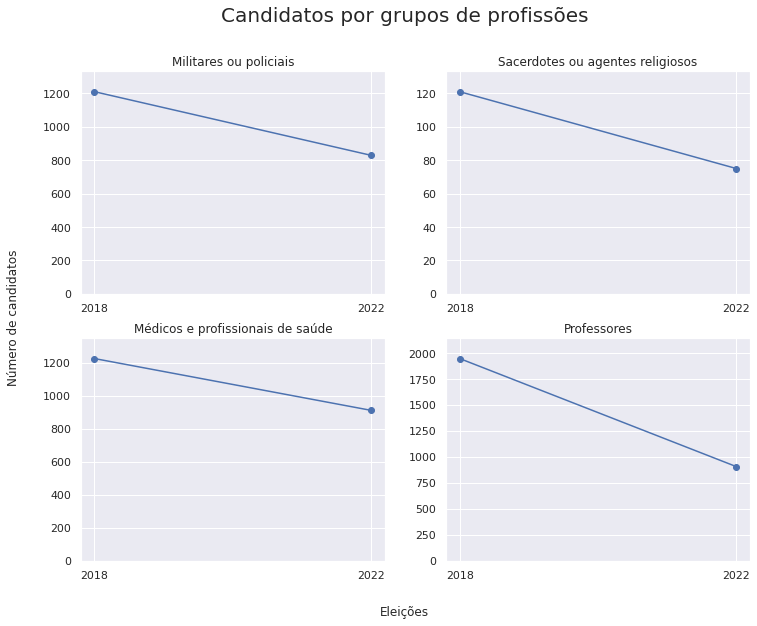

In [91]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(9)
fig.text(0.04, 0.5, 'Número de candidatos', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Eleições', ha='center')

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(['2018','2022'], cd_militar_ou_policia.SQ_CANDIDATO, marker='o')
ax1.set_ylim([0, cd_militar_ou_policia.SQ_CANDIDATO.max()*1.1])
ax1.title.set_text('Militares ou policiais')

ax2.plot(['2018','2022'], cd_religioso.SQ_CANDIDATO, marker='o')
ax2.set_ylim([0, cd_religioso.SQ_CANDIDATO.max()*1.1])
ax2.title.set_text('Sacerdotes ou agentes religiosos')

ax3.plot(['2018','2022'], cd_profissionais_saude.SQ_CANDIDATO, marker='o')
ax3.set_ylim([0, cd_profissionais_saude.SQ_CANDIDATO.max()*1.1])
ax3.title.set_text('Médicos e profissionais de saúde')

ax4.plot(['2018','2022'], cd_professor.SQ_CANDIDATO, marker='o')
ax4.set_ylim([0, cd_professor.SQ_CANDIDATO.max()*1.1])
ax4.title.set_text('Professores')

plt.suptitle('Candidatos por grupos de profissões', size=20)
plt.show()

# Dataframes para exportação
Daqui para baixo é só o código de exportação para o Flourish

In [154]:
total_cand_2022 = total_candidatos[1]
total_historico_data = {'Eleição':[1998, 2002, 2006, 2010, 2014, 2018, 2022], 
                        'Candidatos':[15040, 18049, 19263, 22537, 26161, 29085, total_cand_2022]}

total_historico = pd.DataFrame(data=total_historico)
total_historico

,Eleição,Candidatos
0,1998,15040
1,2002,18049
2,2006,19263
3,2010,22537
4,2014,26161
5,2018,29085
6,2022,17548


In [92]:
negros_partido = raca_ranking[['Partido', 'Parda', 'Preta', 'Todas', 'Pretos+Pardos (%)']]

In [93]:
negros_partido['Outras'] = negros_partido['Todas']-negros_partido['Preta']-negros_partido['Parda']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
negros_partido = negros_partido[['Partido', 'Preta', 'Parda', 'Outras', 'Pretos+Pardos (%)']]

In [95]:
negros_partido.insert(loc=0, column='Posição', value=pd.Series(negros_partido.index.values)+1)

In [96]:
negros_partido

,Posição,Partido,Preta,Parda,Outras,Pretos+Pardos (%)
0,1,AGIR,40,91,67,66.2
1,2,PMB,9,60,43,61.6
2,3,PRTB,24,108,84,61.1
3,4,PCB,10,4,9,60.9
4,5,UP,17,11,18,60.9
5,6,PC do B,34,69,67,60.6
6,7,PMN,60,214,179,60.5
7,8,PSC,54,229,198,58.8
8,9,PSOL,264,151,298,58.2
9,10,DC,21,76,75,56.4


In [97]:
ranking_indigenas = ranking_indigenas.reset_index(drop=True)

In [98]:
ranking_indigenas = ranking_indigenas[['Partido', 'Indígena', 'Todas', 'Indigenas (%)']]

In [99]:
ranking_indigenas.insert(loc=0, column='Posição', value=pd.Series(ranking_indigenas.index.values)+1)

In [100]:
ranking_indigenas.columns = ['Posição', 'Partido', 'Indígenas', 'Todos', 'Indígenas (%)']

In [101]:
negros_ranking.insert(loc=0, column='Posição', value=pd.Series(negros_ranking.index.values)+1)

In [102]:
negros_ranking.columns = ['Posição', 'Partido', 'Pretos', 'Pardos', 'Todos', 'Pretos e pardos (%)']

In [103]:
top10_profissoes.columns = ['Posição', 'Eleição 2018', 'Candidatos', 'Eleição 2022', 'Candidatos']

In [104]:
top10_profissoes['Posição'] = top10_profissoes['Posição']+1

In [105]:
# Formulas para criar coluna de índice numérico iniciada por 1

# dfx['Posição'] = pd.Series(dfx.index.values)+1

# dfx.insert(loc=idx, column='Posição', value=pd.Series(dfx.index.values)+1)

In [106]:
escolaridade_exp = escolaridade.transpose().reset_index()

In [107]:
escolaridade_exp.columns = escolaridade_exp.iloc[0]

In [108]:
escolaridade_exp.columns = ['Eleição', 'Superior completo', 'Superior incompleto',
       'Ensino médio completo', 'Ensino médio incompleto',
       'Ensino fundamental completo', 'Ensino fundamental incompleto',
       'Lê e escreve', 'Não divulgável']

In [109]:
escolaridade_exp = escolaridade_exp[1:3]

In [110]:
ranking_partidos_exp = ranking_partidos.reset_index()

In [111]:
total_2022 = ranking_partidos[2022].sum()
total_2018 = ranking_partidos[2018].sum()

In [112]:
total_2022 = '{:,}'.format(total_2022).replace(',', '.')
total_2018 = '{:,}'.format(total_2018).replace(',', '.')

In [156]:
ranking_partidos_exp.columns = ['Partido', 'Eleições 2018', 'Eleições 2022']

In [157]:
ranking_partidos_exp

,Partido,Eleições 2018,Eleições 2022
0,UNIÃO,2250,1224
1,PL,724,1122
2,REPUBLICANOS,858,1020
3,PODE,1936,991
4,PSB,956,957
5,PP,761,914
6,PT,1313,825
7,AVANTE,1050,819
8,PSD,702,790
9,SOLIDARIEDADE,788,755


In [115]:
# Ajeita a tabela de raça para incluir porcentagens

raca_2018 = raca[raca['Eleição'] == 2018].reset_index(drop=True)
raca_2022 = raca[raca['Eleição'] == 2022].reset_index(drop=True)
raca_2018['Candidatos (%)'] = (raca_2018['Candidatos'] / total_candidatos[0]*100).round(1)
raca_2022['Candidatos (%)'] = (raca_2022['Candidatos'] / total_candidatos[1]*100).round(1)
raca = pd.concat([raca_2018, raca_2022]).reset_index(drop=True)

In [116]:
genero_2018 = genero[genero['Eleição'] == 2018].reset_index(drop=True)
genero_2022 = genero[genero['Eleição'] == 2022].reset_index(drop=True)
genero_2018['Candidatos (%)'] = (genero_2018['Candidatos'] / total_candidatos[0]*100).round(1)
genero_2022['Candidatos (%)'] = (genero_2022['Candidatos'] / total_candidatos[1]*100).round(1)
genero = pd.concat([genero_2018, genero_2022]).reset_index(drop=True)

In [117]:
genero

,Eleição,Gênero,Candidatos,Candidatos (%)
0,2018,Feminino,9221,31.6
1,2018,Masculino,19958,68.4
2,2018,Não divulgável,1,0.0
3,2022,Feminino,5867,33.4
4,2022,Masculino,11681,66.6


In [118]:
diplomados_partido = diplomados_partido[['Partido', 'Candidatos com superior completo', 'Total de candidatos', 'Percentual de diplomados']]

In [119]:
diplomados_partido.columns = ['Partido', 'Candidatos com diploma superior', 'Total',
                              'Diplomados (%)']

In [120]:
diplomados_partido['Candidatos sem diploma superior'] = diplomados_partido['Total']-diplomados_partido['Candidatos com diploma superior']

In [121]:
diplomados_partido = diplomados_partido[['Partido', 'Candidatos com diploma superior', 'Candidatos sem diploma superior', 'Diplomados (%)']]

In [122]:
diplomados_partido.insert(loc=0, column='Posição', value=pd.Series(diplomados_partido.index.values)+1)

In [123]:
diplomados_partido

,Posição,Partido,Candidatos com diploma superior,Candidatos sem diploma superior,Diplomados (%)
0,1,NOVO,397,75,84.1
1,2,PT,611,214,74.1
2,3,PSTU,81,37,68.6
3,4,PC do B,114,56,67.1
4,5,PSD,510,280,64.6
5,6,UNIÃO,789,435,64.5
6,7,MDB,431,244,63.9
7,8,PL,715,407,63.7
8,9,PV,152,88,63.3
9,10,PSOL,441,272,61.9


## Conversão em CSV

In [ ]:
from google.colab import files

In [155]:
total_historico.to_csv('total_historico.csv', index=False)
files.download("/content/total_historico.csv")
ranking_partidos_exp.to_csv('candidatos_partido.csv', index=False)
files.download("/content/candidatos_partido.csv")
raca.to_csv('candidatos_raca.csv', index=False)
files.download("/content/candidatos_raca.csv")
negros_partido.to_csv('negros_partidos.csv', index=False)
files.download("/content/negros_partidos.csv")
ranking_indigenas.to_csv('indigenas_partidos.csv', index=False)
files.download("/content/indigenas_partidos.csv")
genero.to_csv('candidatos_genero.csv', index=False)
files.download("/content/candidatos_genero.csv")
idade_genero.to_csv('idade_genero.csv', index=False)
files.download("/content/idade_genero.csv")
genero_partido.to_csv('genero_partido.csv', index=False)
files.download("/content/genero_partido.csv")
escolaridade_exp.to_csv('candidatos_escolaridade.csv', index=False)
files.download("/content/candidatos_escolaridade.csv")
diplomados_partido.to_csv('escolaridade_partido.csv', index=False)
files.download("/content/escolaridade_partido.csv")
top10_profissoes.to_csv('profissoes_top10.csv', index=False)
files.download("/content/profissoes_top10.csv")
profissoes_grupos.to_csv('profissoes_grupos.csv', index=False)
files.download("/content/profissoes_grupos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
exporta_itens = [(diplomados_partido, 'escolaridade_partido.csv'),
                 (escolaridade_exp, 'candidatos_escolaridade.csv'),
                 (genero, 'candidatos_genero.csv'),
                 (genero_partido, 'genero_partido.csv'),
                 (idade_genero, 'idade_genero.csv'),
                 (negros_partido, 'negros_partidos.csv'),
                 (profissoes_grupos, 'profissoes_grupos.csv'),
                 (raca, 'candidatos_raca.csv'),
                 (ranking_indigenas, 'indigenas_partidos.csv'),
                 (ranking_partidos_exp, 'candidatos_partido.csv'),
                 (top10_profissoes, 'profissoes_top10.csv'),
                 (total_historico, 'total_historico.csv')]

In [163]:
for i in exporta_itens:
    i[0].to_csv(i[1], index=False)
    files.download(f"/content/{i[1]}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>